RS3 Final Project

Analyzing Effect of Fixture Congestion on Premier League and Whether Or Not It Impacts Fatigue Based On Defensive Stats

Saurav Banerjee

Joshua Park

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
%matplotlib inline

In [4]:
data1718 = pd.read_csv('1718processed.csv') 
data1819 = pd.read_csv('1819processed.csv')
data1920 = pd.read_csv('1920processed.csv')

In [5]:
data1718

,Squad,#Pl,TacklesTkl,TacklesTklW,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VsDribblesTkl,VsDribblesAtt,VsDribblesTkl%,VsDribblesPast,PressuresPress,PressuresSucc,Pressures%,PressuresDef3rd,PressuresMid3rd,PressuresAtt3rd,Int,Tkl+Int,Err
0,Arsenal,30,690,436,326,268,96,262,667,39.3,405,5449,1753,32.2,1784,2395,1270,484,1174,12
1,Bournemouth,22,582,331,298,212,72,191,551,34.7,360,5642,1553,27.5,1895,2566,1181,466,1048,8
2,Brighton,24,692,447,411,235,46,230,727,31.6,497,6163,1737,28.2,2544,2589,1030,556,1248,19
3,Burnley,24,578,351,297,223,58,220,632,34.8,412,5957,1637,27.5,2036,2667,1254,529,1107,9
4,Chelsea,26,720,445,357,285,78,238,583,40.8,345,5280,1730,32.8,1924,2329,1027,514,1234,10
5,Crystal Palace,28,760,451,429,268,63,258,682,37.8,424,5664,1661,29.3,2195,2446,1023,631,1391,13
6,Everton,30,749,459,408,260,81,247,672,36.8,425,6595,1817,27.6,2454,2788,1353,580,1329,9
7,Huddersfield,25,829,464,388,349,92,241,674,35.8,433,6575,2029,30.9,2364,2875,1336,546,1375,14
8,Leicester City,27,703,433,376,261,66,203,662,30.7,459,6060,1761,29.1,2233,2644,1183,583,1286,6
9,Liverpool,27,706,448,299,301,106,207,564,36.7,357,5692,1885,33.1,1583,2718,1391,524,1230,10


In [6]:
data1819

,Squad,#Pl,TacklesTkl,TacklesTklW,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VsDribblesTkl,VsDribblesAtt,VsDribblesTkl%,VsDribblesPast,PressuresPress,PressuresSucc,Pressures%,PressuresDef3rd,PressuresMid3rd,PressuresAtt3rd,Int,Tkl+Int,Err
0,Arsenal,28,623,398,305,238,80,207,570,36.3,363,5649,1670,29.6,1812,2628,1209,411,1034,11
1,Bournemouth,28,547,341,290,196,61,173,496,34.9,323,5635,1462,25.9,2042,2427,1166,464,1011,7
2,Brighton,21,712,439,396,226,90,205,587,34.9,382,5993,1675,27.9,2373,2494,1126,502,1214,10
3,Burnley,23,618,355,301,254,63,223,587,38.0,364,5615,1473,26.2,1899,2461,1255,501,1119,16
4,Cardiff City,25,708,417,377,252,79,200,591,33.8,391,6793,1835,27.0,2534,3050,1209,610,1318,10
5,Chelsea,24,655,426,317,251,87,204,534,38.2,330,5454,1673,30.7,1715,2352,1387,443,1098,3
6,Crystal Palace,26,777,457,428,262,87,228,618,36.9,390,6102,1707,28.0,2539,2498,1065,544,1321,11
7,Everton,23,777,458,389,283,105,216,568,38.0,352,6153,1895,30.8,2073,2731,1349,633,1410,15
8,Fulham,28,649,411,356,240,53,201,537,37.4,336,5908,1654,28.0,2268,2594,1046,608,1257,10
9,Huddersfield,31,763,430,366,310,87,224,691,32.4,467,6563,1860,28.3,2286,2972,1305,599,1362,9


In [7]:
data1920

,Squad,#Pl,TacklesTkl,TacklesTklW,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VsDribblesTkl,VsDribblesAtt,VsDribblesTkl%,VsDribblesPast,PressuresPress,PressuresSucc,Pressures%,PressuresDef3rd,PressuresMid3rd,PressuresAtt3rd,Int,Tkl+Int,Err
0,Arsenal,27,560,344,257,207,96,178,410,43.4,232,4660,1388,29.8,1372,1872,1416,468,1028,12
1,Aston Villa,30,668,390,335,254,79,244,567,43.0,323,5349,1498,28.0,1788,2352,1209,570,1238,6
2,Brentford,29,681,391,333,248,100,254,591,43.0,337,5416,1550,28.6,1944,2279,1193,571,1252,12
3,Brighton,26,710,444,319,274,117,237,562,42.2,325,5535,1792,32.4,1758,2218,1559,555,1265,14
4,Burnley,23,618,354,292,247,79,220,548,40.1,328,5400,1456,27.0,1732,2319,1349,612,1230,10
5,Chelsea,25,634,382,266,267,101,203,516,39.3,313,5404,1661,30.7,1612,2310,1482,550,1184,13
6,Crystal Palace,24,665,411,327,252,86,220,501,43.9,281,5695,1700,29.9,1973,2490,1232,535,1200,6
7,Everton,32,736,462,376,265,95,287,672,42.7,385,6026,1803,29.9,2094,2570,1362,578,1314,10
8,Leeds United,29,846,466,434,313,99,367,857,42.8,490,6928,2067,29.8,2416,3004,1508,615,1461,13
9,Leicester City,28,735,429,351,292,92,255,647,39.4,392,5825,1676,28.8,1998,2576,1251,520,1255,14


In [8]:
from scipy.stats import f_oneway
from scipy import mean

In [9]:
statnames = data1920.columns[1:]

#Pl


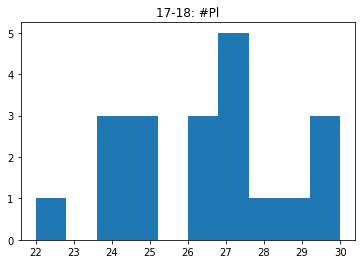

Mean 26.45


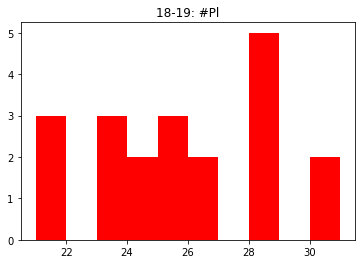

Mean 25.4


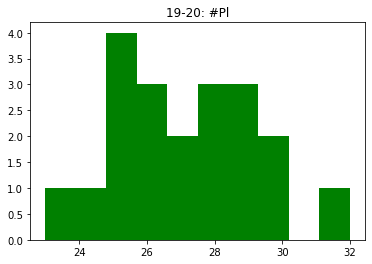

Mean 27.1
ANOVA Values
F_onewayResult(statistic=0.9821826280623608, pvalue=0.3807404291169192)
TacklesTkl


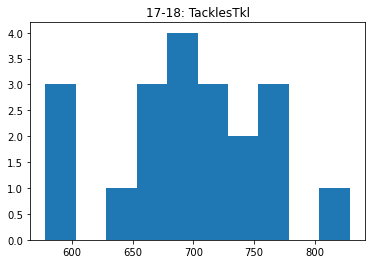

Mean 696.65


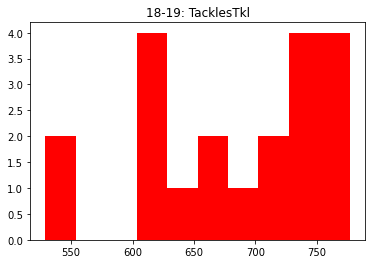

Mean 683.3


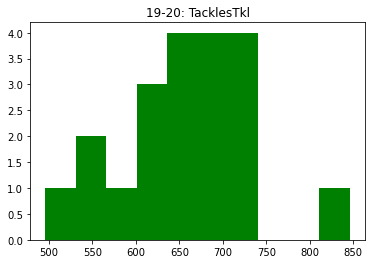

Mean 657.4
ANOVA Values
F_onewayResult(statistic=0.2332667254386761, pvalue=0.7926945755671473)
TacklesTklW


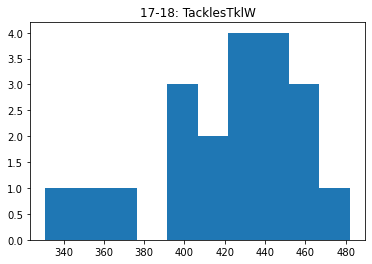

Mean 422.55


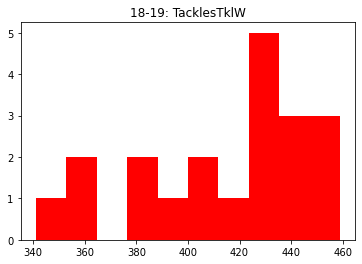

Mean 413.95


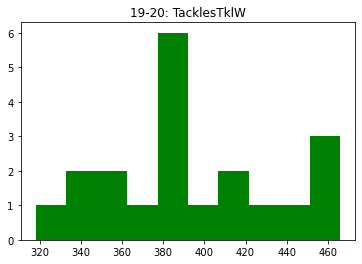

Mean 393.45
ANOVA Values
F_onewayResult(statistic=0.3751766266168386, pvalue=0.6888521227568817)
TacklesDef3rd


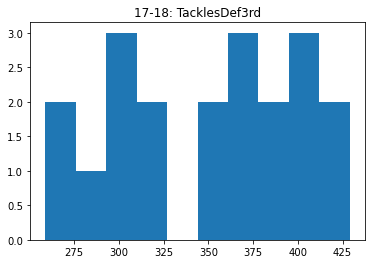

Mean 351.95


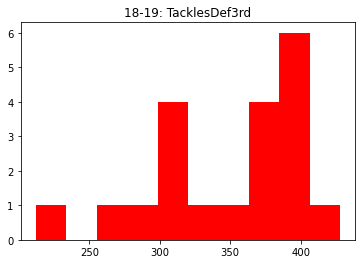

Mean 349.6


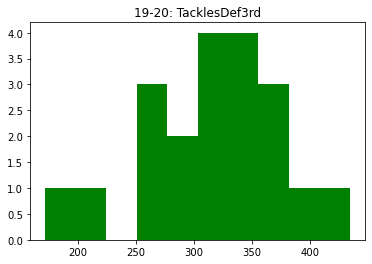

Mean 319.0
ANOVA Values
F_onewayResult(statistic=0.012320600392594194, pvalue=0.9877576172012333)
TacklesMid3rd


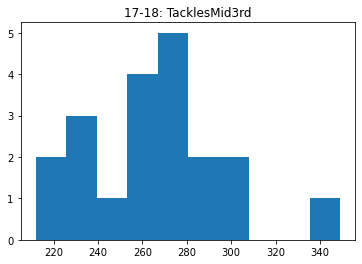

Mean 264.8


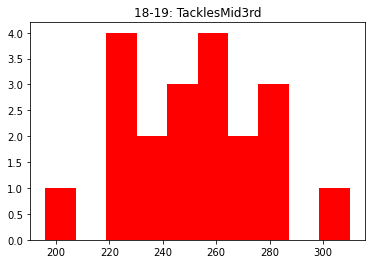

Mean 253.3


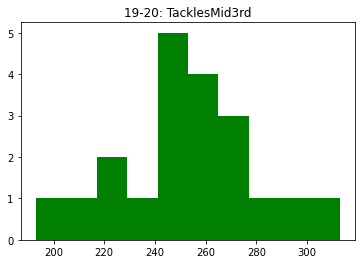

Mean 251.35
ANOVA Values
F_onewayResult(statistic=1.118129472072906, pvalue=0.3339536030136585)
TacklesAtt3rd


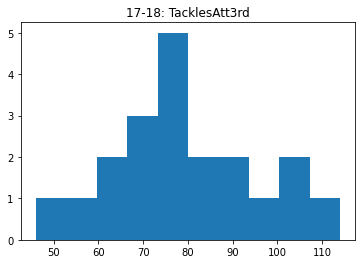

Mean 79.9


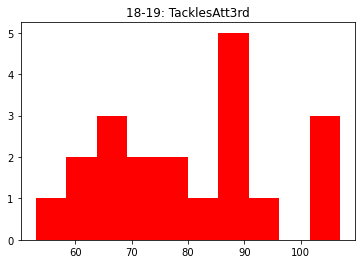

Mean 80.4


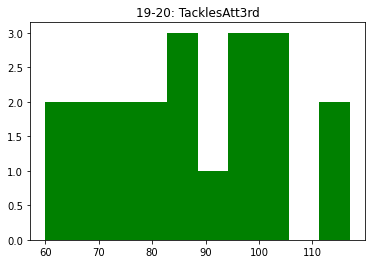

Mean 87.05
ANOVA Values
F_onewayResult(statistic=0.006697026520225019, pvalue=0.9933261300560847)
VsDribblesTkl


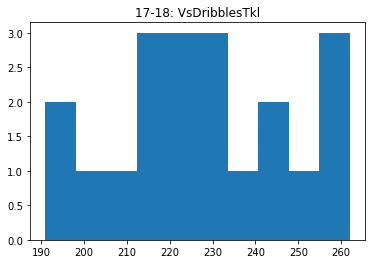

Mean 228.05


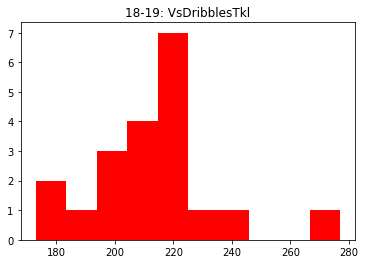

Mean 213.4


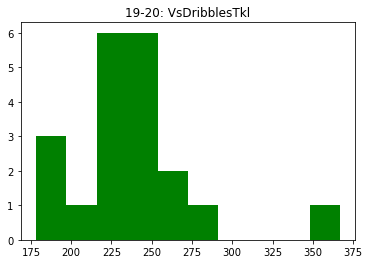

Mean 235.3
ANOVA Values
F_onewayResult(statistic=3.0344873132898385, pvalue=0.05593503742377694)
VsDribblesAtt


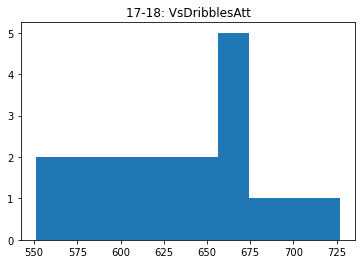

Mean 634.75


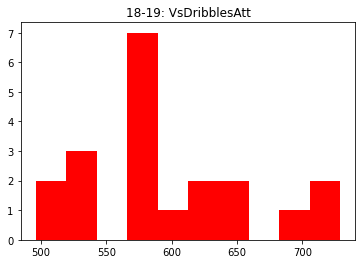

Mean 594.15


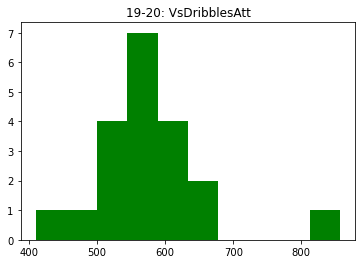

Mean 575.95
ANOVA Values
F_onewayResult(statistic=3.061367691257648, pvalue=0.054593104048497404)
VsDribblesTkl%


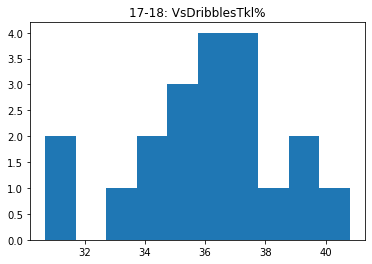

Mean 35.955


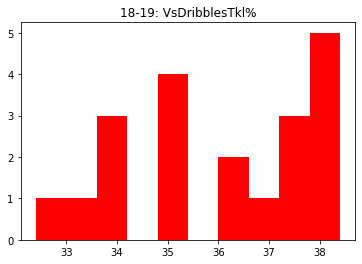

Mean 35.98


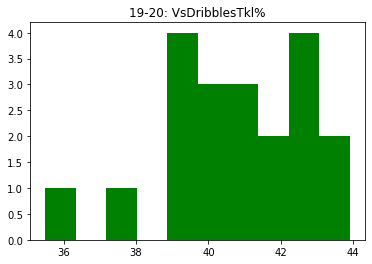

Mean 40.81
ANOVA Values
F_onewayResult(statistic=0.0009228551389431133, pvalue=0.9990775854882242)
VsDribblesPast


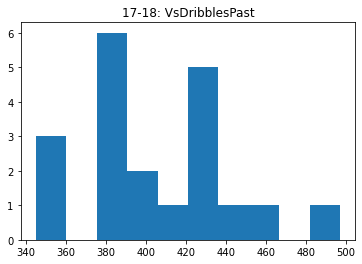

Mean 406.7


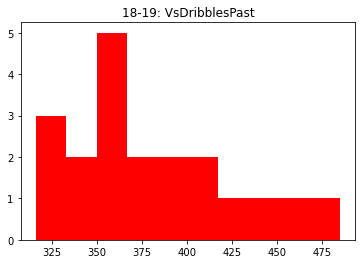

Mean 380.75


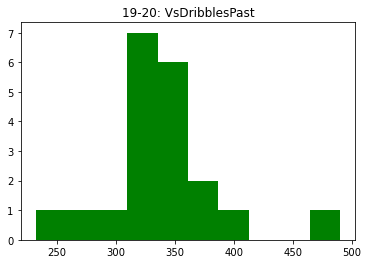

Mean 340.65
ANOVA Values
F_onewayResult(statistic=2.280407383412186, pvalue=0.111495965036905)
PressuresPress


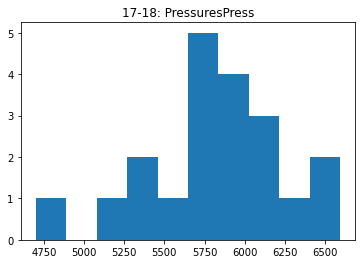

Mean 5826.9


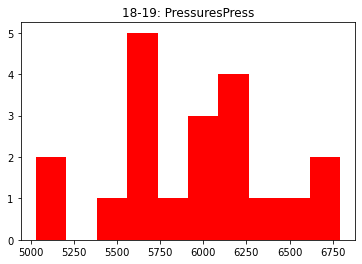

Mean 5931.25


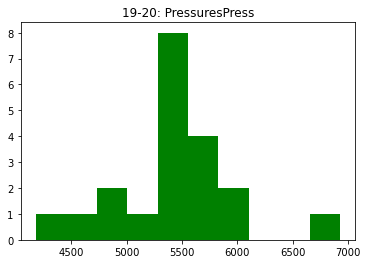

Mean 5435.65
ANOVA Values
F_onewayResult(statistic=0.3258742406865952, pvalue=0.7232319670414316)
PressuresSucc


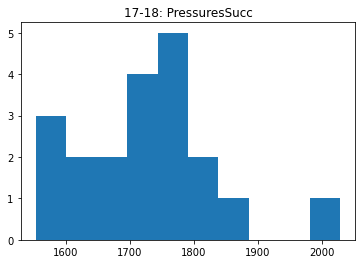

Mean 1726.95


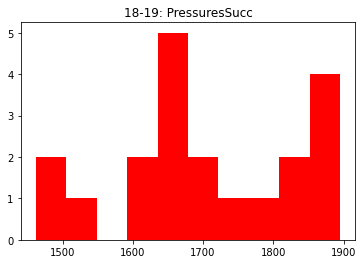

Mean 1705.35


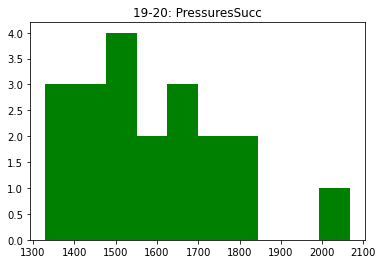

Mean 1589.3
ANOVA Values
F_onewayResult(statistic=0.1955945745620415, pvalue=0.8228951796960114)
Pressures%


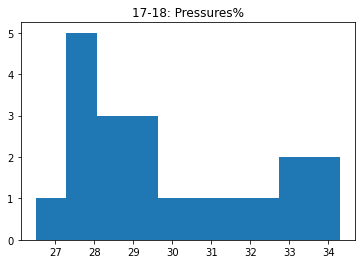

Mean 29.765000000000008


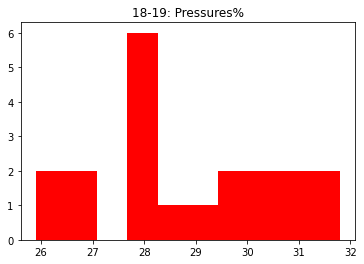

Mean 28.800000000000004


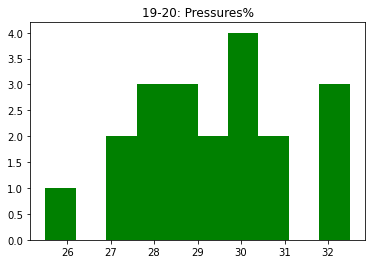

Mean 29.28
ANOVA Values
F_onewayResult(statistic=1.5729767453231718, pvalue=0.2162970439582328)
PressuresDef3rd


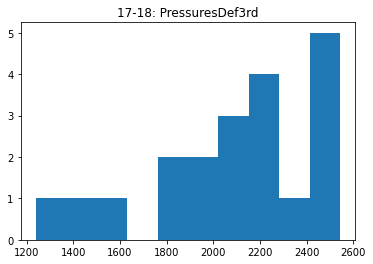

Mean 2076.85


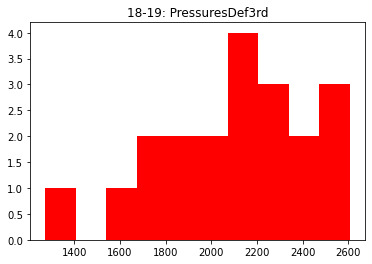

Mean 2098.6


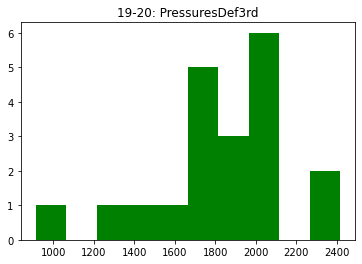

Mean 1828.15
ANOVA Values
F_onewayResult(statistic=0.025664293332984412, pvalue=0.9746734911923046)
PressuresMid3rd


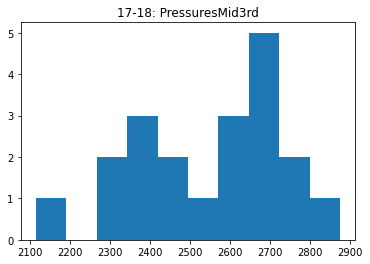

Mean 2554.3


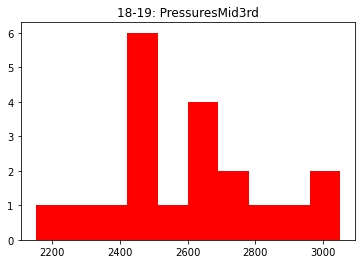

Mean 2601.8


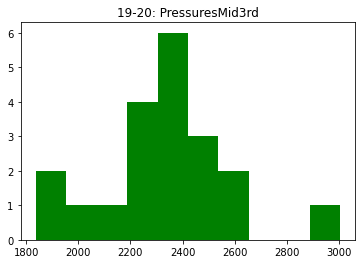

Mean 2322.1
ANOVA Values
F_onewayResult(statistic=0.3260399261867283, pvalue=0.7231135026929335)
PressuresAtt3rd


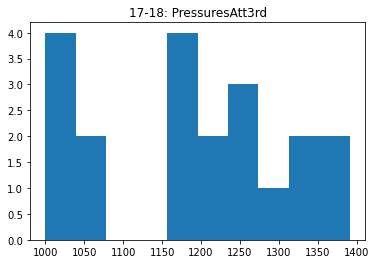

Mean 1195.75


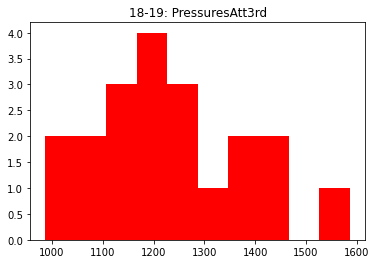

Mean 1230.85


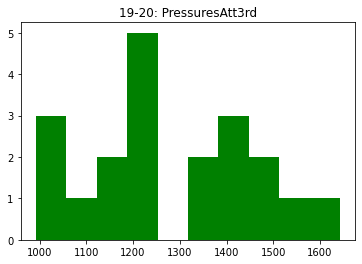

Mean 1285.4
ANOVA Values
F_onewayResult(statistic=0.39992709863813114, pvalue=0.672235145269355)
Int


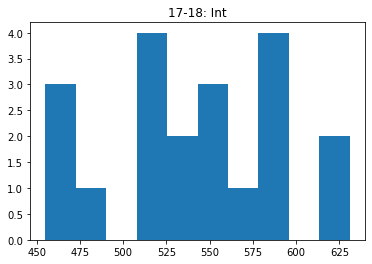

Mean 543.75


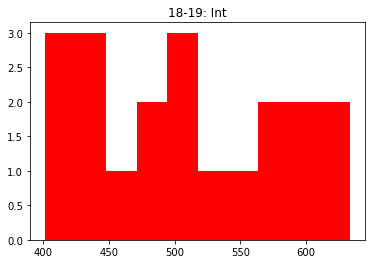

Mean 509.45


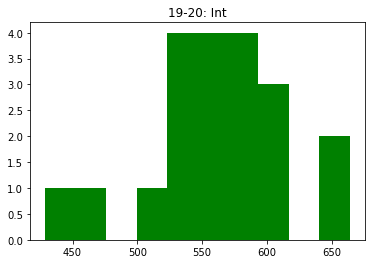

Mean 561.9
ANOVA Values
F_onewayResult(statistic=1.7414161771525367, pvalue=0.1844666880156552)
Tkl+Int


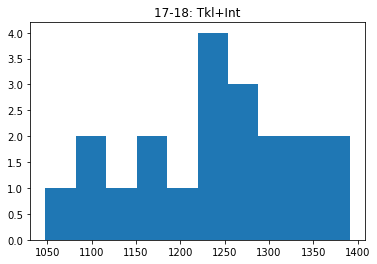

Mean 1240.4


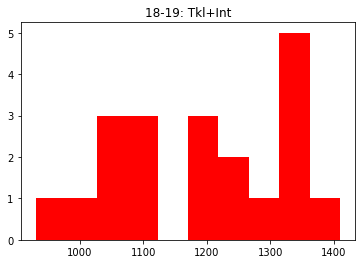

Mean 1192.75


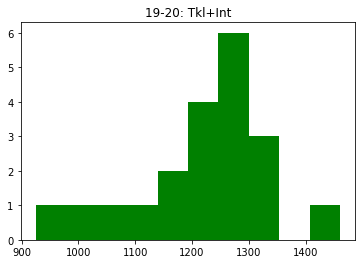

Mean 1219.3
ANOVA Values
F_onewayResult(statistic=0.9981377434714589, pvalue=0.3749146675708669)
Err


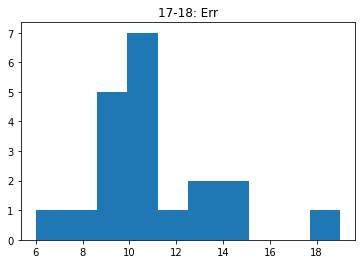

Mean 10.85


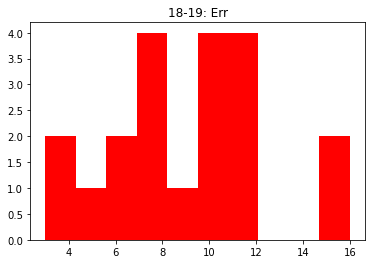

Mean 8.9


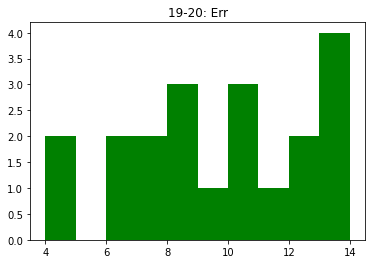

Mean 9.3
ANOVA Values
F_onewayResult(statistic=2.4401756311745344, pvalue=0.09620096604255621)


In [10]:
for x in range(len(statnames)):
    print(statnames[x])
    plt.hist(data1718.loc[:,statnames[x]])
    plt.title("17-18: " + statnames[x])
    plt.show()
    print("Mean " + str(np.mean(data1718.loc[:,statnames[x]])))
    plt.hist(data1819.loc[:,statnames[x]],color = "red")
    plt.title("18-19: " + statnames[x])
    plt.show()
    print("Mean " + str(np.mean(data1819.loc[:,statnames[x]])))
    plt.hist(data1920.loc[:,statnames[x]],color = "green")
    plt.title("19-20: " + statnames[x])
    plt.show()
    print("Mean " + str(np.mean(data1920.loc[:,statnames[x]])))
    print("ANOVA Values")
    print(f_oneway(data1718.loc[:,statnames[x]], data1819.loc[:,statnames[x]],data1819.loc[:,statnames[x]]))

In [11]:
for x in range(len(statnames)):
    print(statnames[x])
    print("17-18 Mean")
    print(np.mean(data1718.loc[:,statnames[x]]))
    print("18-19 Mean")
    print(np.mean(data1819.loc[:,statnames[x]]))
    print("19-20 Mean")
    print(np.mean(data1920.loc[:,statnames[x]]))
    print("Probability")
    print(f_oneway(data1718.loc[:,statnames[x]], data1819.loc[:,statnames[x]],data1819.loc[:,statnames[x]]).pvalue)

#Pl
17-18 Mean
26.45
18-19 Mean
25.4
19-20 Mean
27.1
Probability
0.3807404291169192
TacklesTkl
17-18 Mean
696.65
18-19 Mean
683.3
19-20 Mean
657.4
Probability
0.7926945755671473
TacklesTklW
17-18 Mean
422.55
18-19 Mean
413.95
19-20 Mean
393.45
Probability
0.6888521227568817
TacklesDef3rd
17-18 Mean
351.95
18-19 Mean
349.6
19-20 Mean
319.0
Probability
0.9877576172012333
TacklesMid3rd
17-18 Mean
264.8
18-19 Mean
253.3
19-20 Mean
251.35
Probability
0.3339536030136585
TacklesAtt3rd
17-18 Mean
79.9
18-19 Mean
80.4
19-20 Mean
87.05
Probability
0.9933261300560847
VsDribblesTkl
17-18 Mean
228.05
18-19 Mean
213.4
19-20 Mean
235.3
Probability
0.05593503742377694
VsDribblesAtt
17-18 Mean
634.75
18-19 Mean
594.15
19-20 Mean
575.95
Probability
0.054593104048497404
VsDribblesTkl%
17-18 Mean
35.955
18-19 Mean
35.98
19-20 Mean
40.81
Probability
0.9990775854882242
VsDribblesPast
17-18 Mean
406.7
18-19 Mean
380.75
19-20 Mean
340.65
Probability
0.111495965036905
PressuresPress
17-18 Mean
5826.9
18-19 Mea

In [14]:
import seaborn as sns

In [18]:
def listofones(x):
    l = []
    for b in range(x):
        l.append(b)
    return l


#Pl


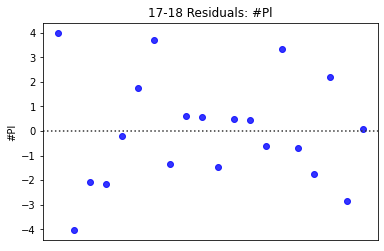

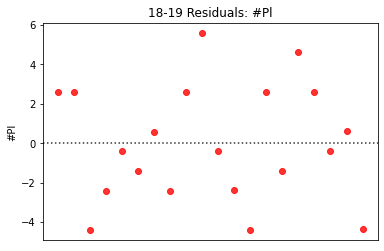

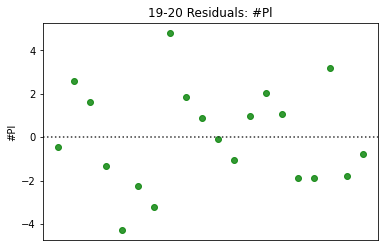

TacklesTkl


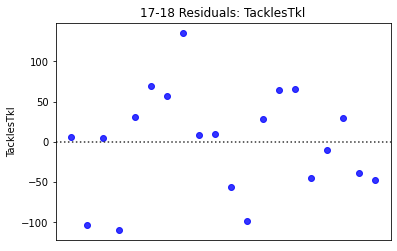

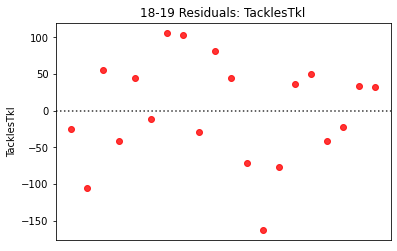

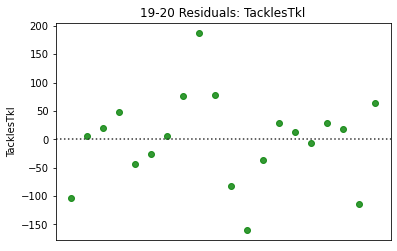

TacklesTklW


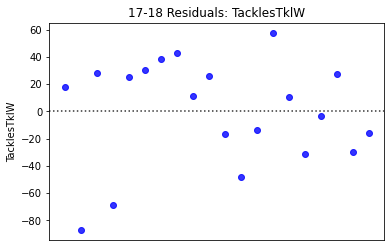

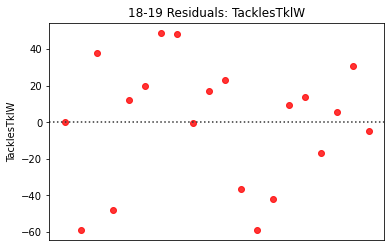

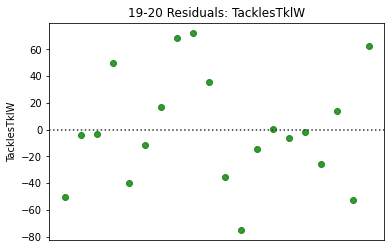

TacklesDef3rd


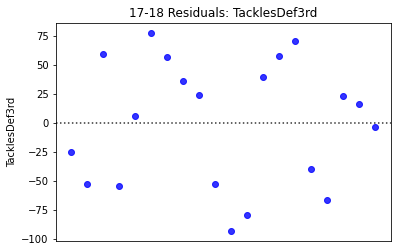

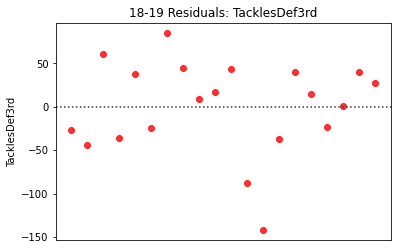

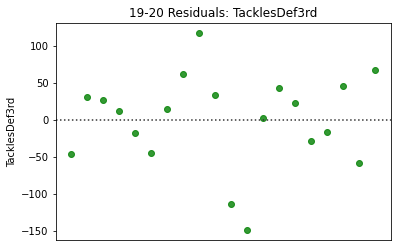

TacklesMid3rd


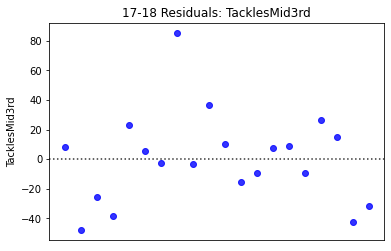

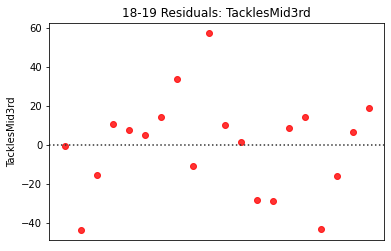

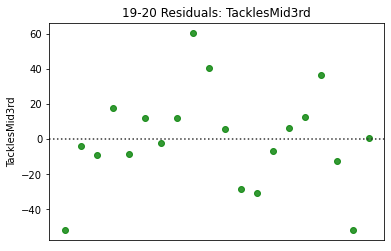

TacklesAtt3rd


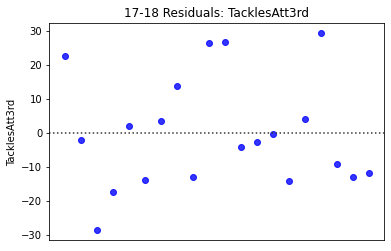

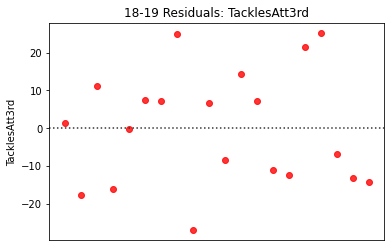

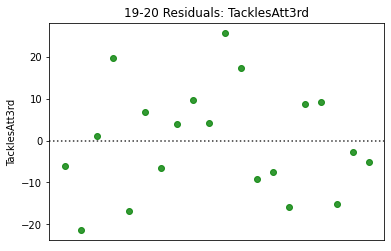

VsDribblesTkl


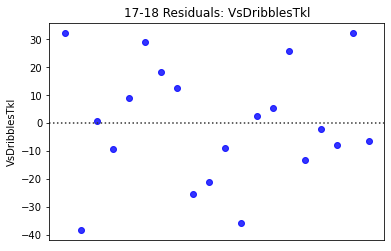

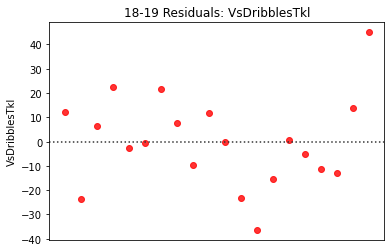

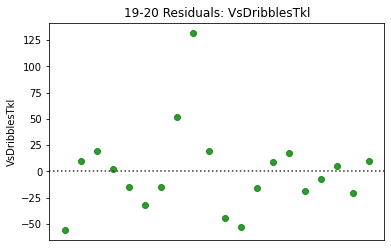

VsDribblesAtt


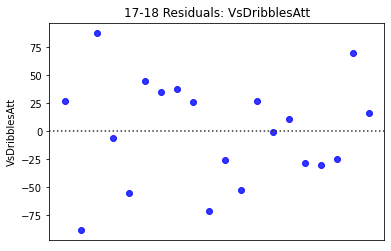

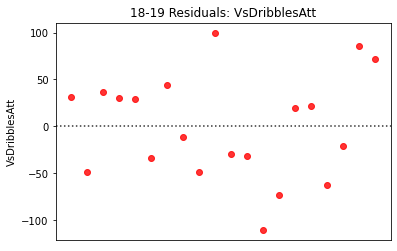

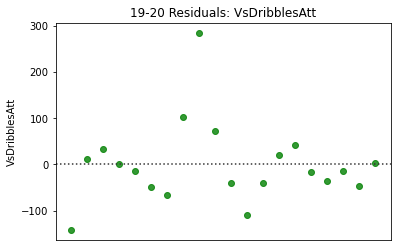

VsDribblesTkl%


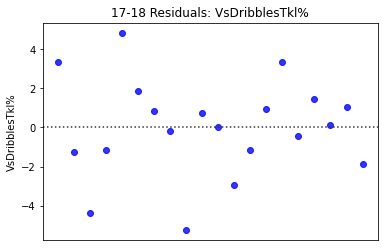

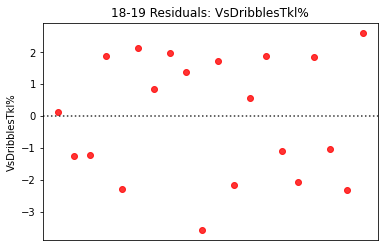

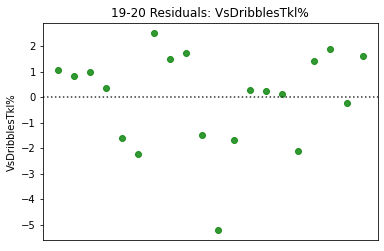

VsDribblesPast


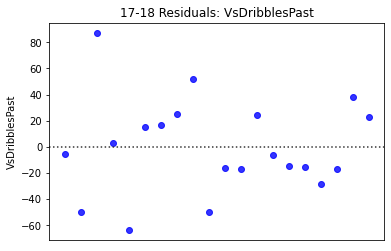

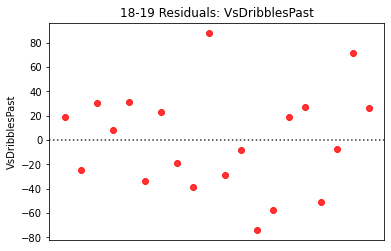

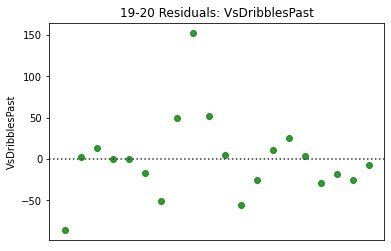

PressuresPress


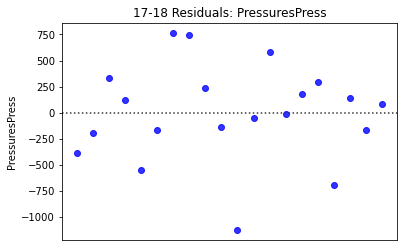

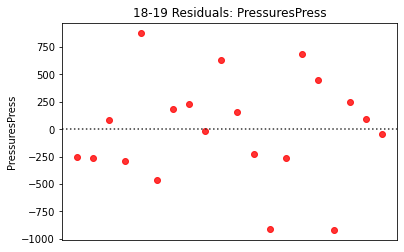

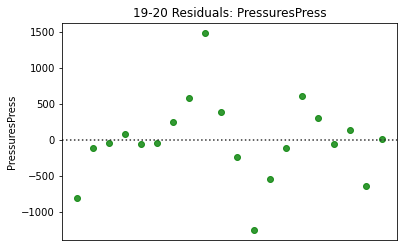

PressuresSucc


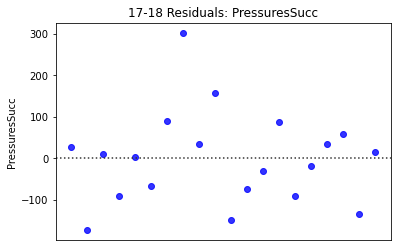

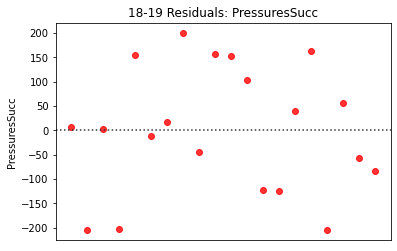

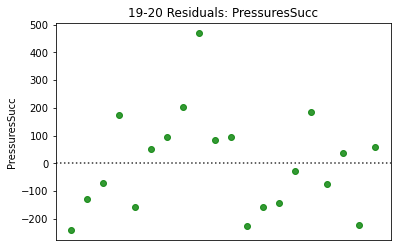

Pressures%


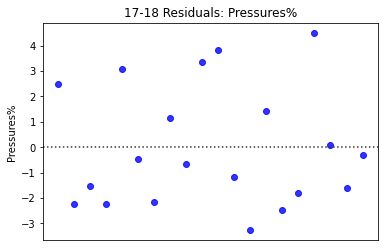

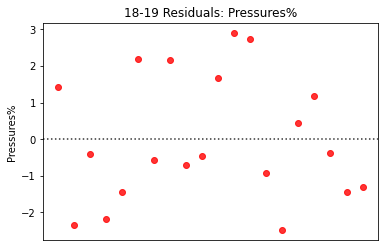

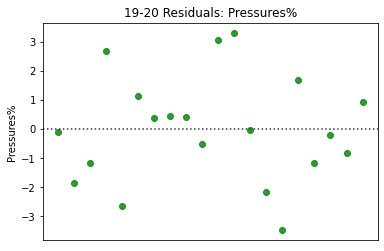

PressuresDef3rd


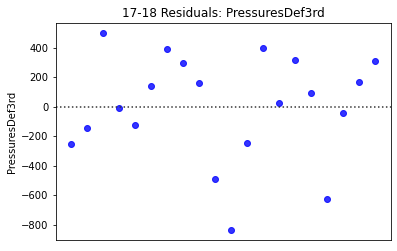

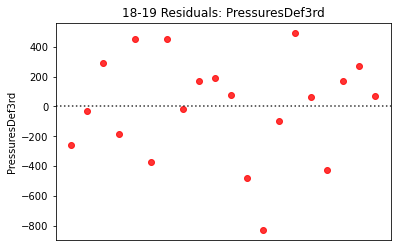

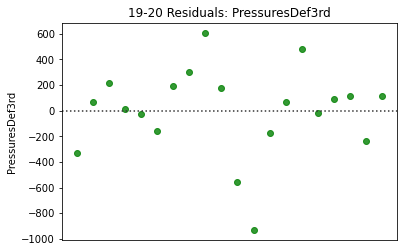

PressuresMid3rd


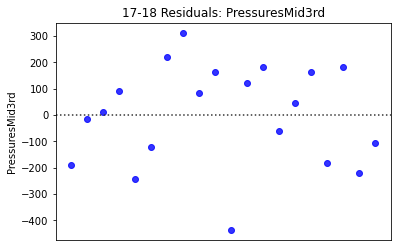

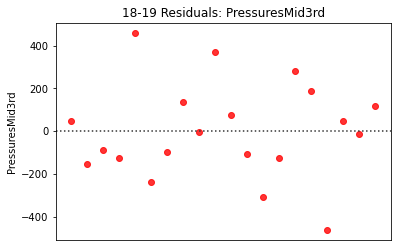

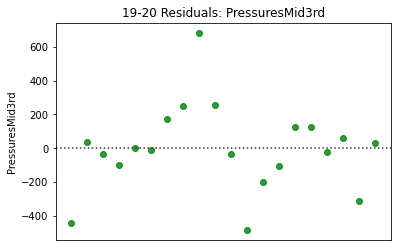

PressuresAtt3rd


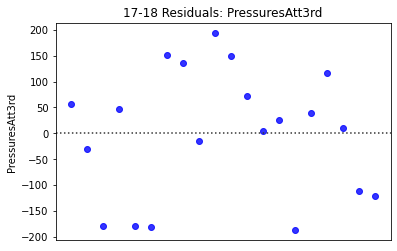

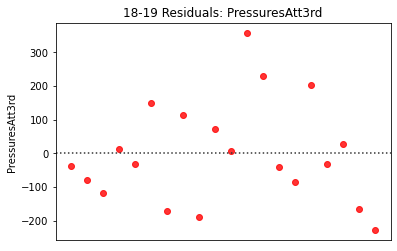

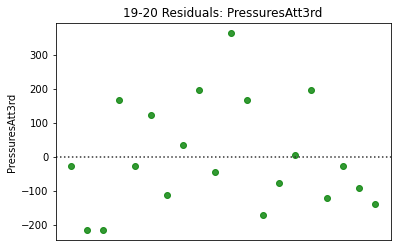

Int


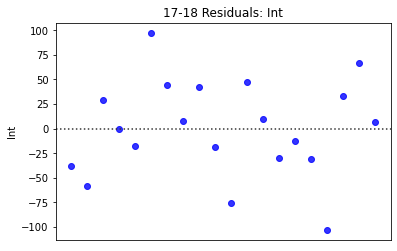

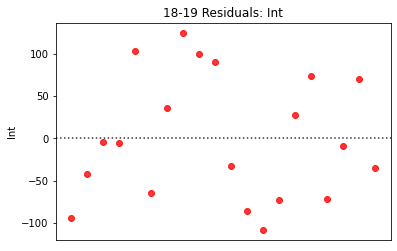

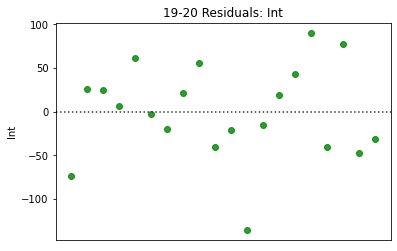

Tkl+Int


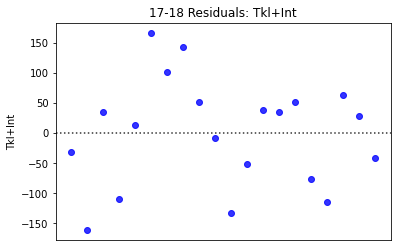

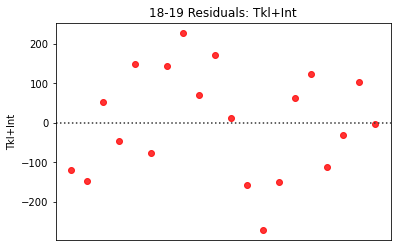

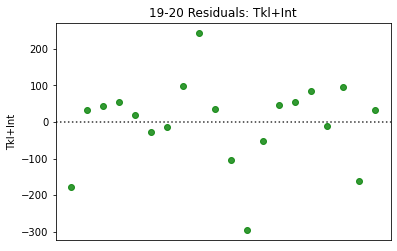

Err


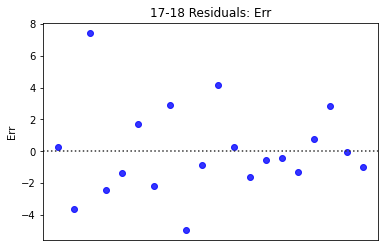

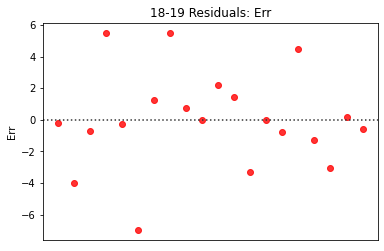

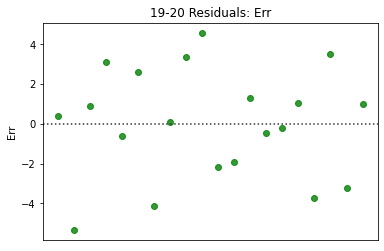

In [25]:
for x in range(len(statnames)):
    print(statnames[x])
    sns.residplot(x = listofones(len(data1718.loc[:,statnames[x]])),y = data1718.loc[:,statnames[x]],color = "blue")
    plt.title("17-18 Residuals: " + statnames[x])
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    plt.show()

    sns.residplot(x = listofones(len(data1819.loc[:,statnames[x]])),y = data1819.loc[:,statnames[x]], color = "red")
    plt.title("18-19 Residuals: " + statnames[x])
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    plt.show()

    sns.residplot(x = listofones(len(data1920.loc[:,statnames[x]])),y = data1920.loc[:,statnames[x]], color = "green")
    plt.title("19-20 Residuals: " + statnames[x])
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    plt.show()
   